In [1]:
import dd
import pandas as pd
import numpy as np
from getsig import getsig
from scipy.interpolate import interp1d
from scipy.signal import medfilt
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, FancyArrowPatch
#
plt.style.use('helvet2')

In [2]:
t = np.arange(1.2, 6.0, 0.025)
shotnr = 30554

In [3]:
h98 = getsig(shotnr, 'TTH', 'H/L-facs')
beta = getsig(shotnr, 'TOT', 'beta_N')

/afs/ipp/aug/ads-diags/common/python/lib/dd_20180216.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd_20180216.py:117: RuntimeWarning: Warning by DDcsgnl (8.1): no calibration of data
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


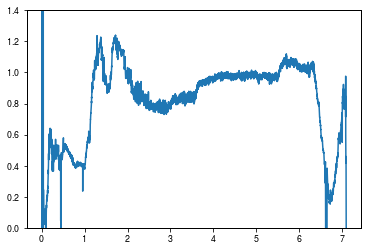

In [4]:
plt.plot(h98.time,h98.data[:,7])
plt.ylim(0,1.4)
plt.show()

In [11]:
#sd = getsig(shotnr, 'DNE', 'neDdel_2', exper='SFP')
sdfile = np.loadtxt('./SupportFiles/SBD.30554')
sbd = np.loadtxt('/home/guimas/diags/'+str(shotnr)+'/krxv0006.txt')

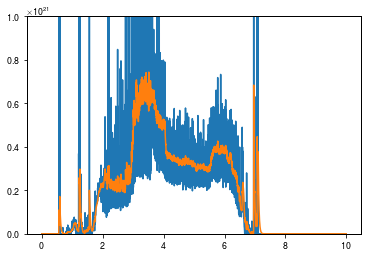

In [13]:
plt.plot(sdfile[:,0],sdfile[:,18])
plt.plot(sbd[:,0],sbd[:,1])
plt.ylim(0,1e21)
plt.show()

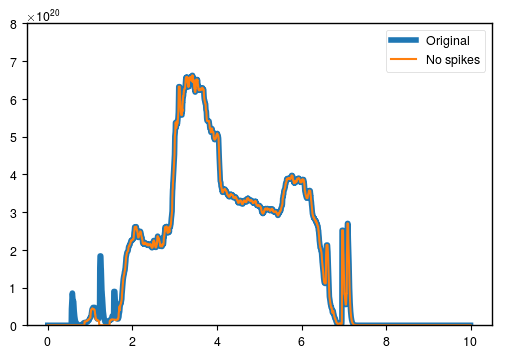

In [41]:
plt.figure(dpi=100)
#plt.plot(td,sd[:,17])
#rx6 = medfilt(sd.data[:,17], 51)
rx6time = sd[:,0]
rx6 = medfilt(sd[:,18], 51)

plt.plot(sbd[:,0],medfilt(sbd[:,1],21), label='Original', lw=4)
plt.ylim(0,8e20)
#plt.plot(sd.time,rx6)
#Replace rx6 by the kalman version
td = sbd[:,0]
rx6s = medfilt(sbd[:,1],21)
#Graft the original start to avoid strange peaks t<1.9
rx6s[rx6time<1.7]=rx6[td<1.7]

plt.plot(rx6time, rx6s, label='No spikes')
plt.legend()
plt.show()

In [48]:
len(rx6)

4000

In [19]:
snbi = getsig(30554, 'NIS', 'PNI')

In [20]:
sdtot = getsig(shotnr, 'UVS', 'D_tot')

In [21]:
sntot = getsig(shotnr, 'UVS', 'N_tot')

In [51]:
h98inter = interp1d(h98.time,h98.data[:,7])
h98i = h98inter(t)
#rx6inter = interp1d(rx6time,rx6s)
#Why is it different with rx6s or rx6???
rx6inter = interp1d(rx6time,rx6)
rx6i = rx6inter(t)
nbi_inter = interp1d(snbi.time, snbi.data)
inbi = nbi_inter(t)
intdtot = interp1d(sdtot.time,sdtot.data)
idtot = intdtot(t)
tau = getsig(shotnr, 'TOT', 'tau_tot')
tauint = interp1d(tau.time,tau.data)
itau = tauint(t)
betaint = interp1d(beta.time,beta.data)
ibeta = betaint(t)

In [52]:
clr2 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
timesint = np.array([1.65, 2.9, 3.65, 5.5])

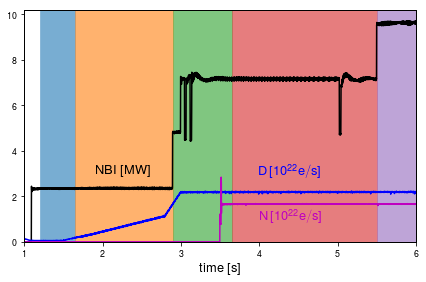

In [53]:
plt.figure(figsize=(6,4))
plt.plot(snbi.time, snbi.data*1e-6,color='k')
plt.plot(sdtot.time, sdtot.data*1e-22,color='b')
plt.plot(sntot.time, sntot.data*1e-22,color='m')
alp=0.6
plt.axvspan(1.2,timesint[0],color='C0',alpha=alp)
plt.axvspan(timesint[0],timesint[1],color='C1',alpha=alp)
plt.axvspan(timesint[1],timesint[2],color='C2',alpha=alp)
plt.axvspan(timesint[2],timesint[3],color='C3',alpha=alp)
plt.axvspan(timesint[3],6.0,color='C4',alpha=alp)
plt.text(1.9,3.0,'NBI [MW]', size='x-large')
plt.text(4.0,3.0,r'$\mathrm{D\,[10^{22}e/s]}$', size='x-large', color='b')
plt.text(4.0,1.0,r'$\mathrm{N\,[10^{22}e/s]}$', size='x-large', color='m')
plt.xlim(1,6)
plt.ylim(bottom=0)
plt.xlabel('time [s]', size='x-large')
plt.tight_layout()
#plt.savefig('shot.png',dpi=300, transparent=True)
plt.show()

In [54]:
def get_colors(inp, colormap, vmin=None, vmax=None):
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(inp))

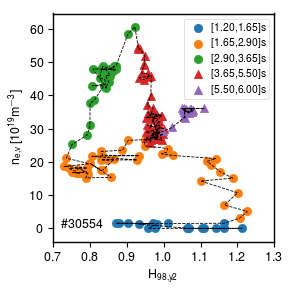

In [55]:
fig = plt.figure(figsize=(3,3), dpi=100)
ax1 = fig.add_subplot(111)

for i in range(len(h98i)):
    mrk = 'o'
    if t[i]<timesint[0]:
        clr=clr2[0]
    elif (t[i]>=timesint[0]) & (t[i]<=timesint[1]):
        clr = clr2[1]
    elif (t[i]>=timesint[1]) & (t[i]<=timesint[2]):
        clr = clr2[2]
    elif (t[i]>=timesint[2]) & (t[i]<=timesint[3]):
        clr = clr2[3]
        mrk = '^'
    else:
        clr = clr2[4]
        mrk = '^'
    ax1.scatter(h98i[i], rx6i[i]*1e-19, s=35, marker=mrk, c=clr)

#fclr = clr2[0]
#style="Simple,tail_width=3,head_width=8,head_length=8"
#kw = dict(arrowstyle=style, color=fclr,linestyle=None)
#l1 = FancyArrowPatch((0.85,5),(1.3,5), **kw)
#ax1.add_patch(l1)
#ax1.text(1.0, 7, '1', color=fclr, size='large')

#fclr = clr2[1]
#style="Simple,tail_width=3,head_width=8,head_length=8"
#kw = dict(arrowstyle=style, color=fclr,linestyle=None)
#l2 = FancyArrowPatch((1.25,18),(0.8,25), connectionstyle="arc3,rad=.25", **kw)
#ax1.add_patch(l2)
#ax1.text(1.0, 33, '2', color=fclr, size='large')

#fclr = 'b'
#style="Simple,tail_width=3,head_width=8,head_length=8"
#kw = dict(arrowstyle=style, color=fclr,linestyle=None)
#l2 = FancyArrowPatch((0.79,26),(0.79,50),  **kw)
#ax1.add_patch(l2)
#ax1.text(0.8, 40, '3', color=fclr, size='large')

#fclr = 'm'
#style="Simple,tail_width=3,head_width=8,head_length=8"
#kw = dict(arrowstyle=style, color=fclr,linestyle=None)
#l2 = FancyArrowPatch((0.85,60),(0.9,35), connectionstyle="arc3,rad=-.15", **kw)
#ax1.add_patch(l2)
#ax1.text(0.9, 46, '4', color=fclr, size='large')

#Force labels
plt.scatter([0,0],[0,0],c='C0',label='[1.20,%0.2f]s'%(timesint[0]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
plt.scatter([0,0],[0,0],c='C1',label='[%0.2f,%0.2f]s'%(timesint[0],timesint[1]))#,label=r'$\mathrm{Fuel\,\,ramp}$')
plt.scatter([0,0],[0,0],c='C2',label='[%0.2f,%0.2f]s'%(timesint[1],timesint[2]))#label=r'$\mathrm{Power\,\,step}$')
plt.scatter([0,0],[0,0],c='C3',label='[%0.2f,%0.2f]s'%(timesint[2],timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
plt.scatter([0,0],[0,0],c='C4',label='[%0.2f,6.00]s'%(timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax1.plot(h98i, rx6i*1e-19, c='k', lw=0.6, ls='--')

plt.text(0.72, 0, '\#30554')
plt.xticks([0.7,0.8,0.9,1.0,1.1,1.2,1.3])

plt.legend(handletextpad=0.2, fontsize='small')
plt.xlim(0.7,1.3)
ax1.set_xlabel(r'$\mathrm{H_{98,y2}}$')
ax1.set_ylabel(r'$\mathrm{n_{e,v}\,[10^{19}m^{-3}]}$')
plt.tight_layout()
plt.savefig('/home/guimas/Documents/Publications/hmode2016/Figures/Allfigures/Figures/Discharge_evolution.png', dpi=300, transparent=True)
plt.show()

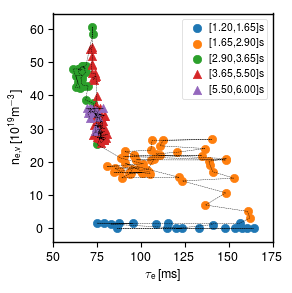

In [56]:
fig = plt.figure(figsize=(3,3), dpi=100)
ax1 = fig.add_subplot(111)

for i in range(len(h98i)):
    mrk = 'o'
    if t[i]<timesint[0]:
        clr=clr2[0]
    elif (t[i]>=timesint[0]) & (t[i]<=timesint[1]):
        clr = clr2[1]
    elif (t[i]>=timesint[1]) & (t[i]<=timesint[2]):
        clr = clr2[2]
    elif (t[i]>=timesint[2]) & (t[i]<=timesint[3]):
        clr = clr2[3]
        mrk = '^'
    else:
        clr = clr2[4]
        mrk = '^'
    ax1.scatter(itau[i]*1e3, rx6i[i]*1e-19, s=35, marker=mrk, c=clr)

#Force labels
plt.scatter([0,0],[0,0],c='C0',label='[1.20,%0.2f]s'%(timesint[0]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
plt.scatter([0,0],[0,0],c='C1',label='[%0.2f,%0.2f]s'%(timesint[0],timesint[1]))#,label=r'$\mathrm{Fuel\,\,ramp}$')
plt.scatter([0,0],[0,0],c='C2',label='[%0.2f,%0.2f]s'%(timesint[1],timesint[2]))#label=r'$\mathrm{Power\,\,step}$')
plt.scatter([0,0],[0,0],c='C3',label='[%0.2f,%0.2f]s'%(timesint[2],timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
plt.scatter([0,0],[0,0],c='C4',label='[%0.2f,6.00]s'%(timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax1.plot(itau*1e3,rx6i*1e-19, c='k', lw=0.3, ls='--')

#plt.text(0.72, 0, '\#30554')
plt.xlim(50,175)
plt.xticks([50,75,100,125,150,175])

plt.legend(handletextpad=0.2, fontsize='small')

#ax1.set_xlabel(r'$\mathrm{H_{98,y2}}$')
ax1.set_xlabel(r'$\mathrm{\tau_e\,[ms]}$')
ax1.set_ylabel(r'$\mathrm{n_{e,v}\,[10^{19}m^{-3}]}$')
plt.tight_layout()
#plt.savefig('/home/guimas/Documents/Publications/hmode2016/Figures/Allfigures/Figures/Discharge_tion_tau.png', dpi=300, transparent=True)
plt.show()

### HFSHD (y) as a function of fuelling, confinement time and beta

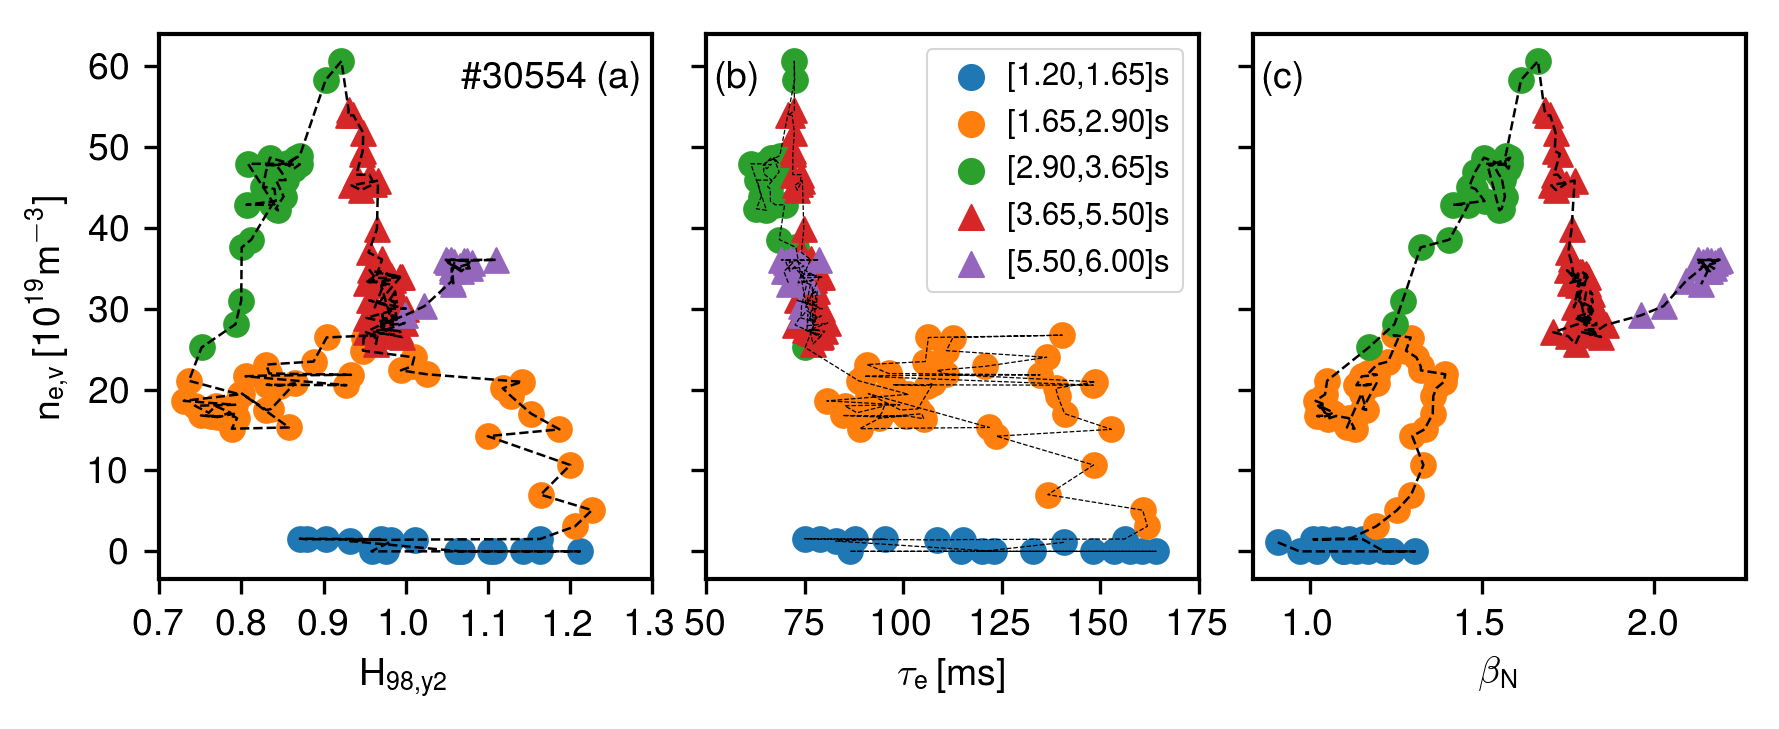

In [57]:
fig, axarr = plt.subplots(
            nrows=1, ncols=3, sharey=True, sharex=False, 
            gridspec_kw={'width_ratios':[1,1,1]},
            figsize=(6, 2.5), dpi=300)

ax0 = axarr[0]
ax1 = axarr[1]
ax2 = axarr[2]

ax0.text(0.98,0.9,'\#30554 (a)', ha='right', transform=ax0.transAxes)
ax1.text(0.02,0.9,'(b)', ha='left', transform=ax1.transAxes)
ax2.text(0.02,0.9,'(c)', ha='left', transform=ax2.transAxes)

#Discharge evolution
ax0.set_ylabel(r'$\mathrm{n_{e,v}\,[10^{19}m^{-3}]}$')
ax0.set_xlabel('time [s]')

###Scatters
for i in range(len(h98i)):
    mrk = 'o'
    if t[i]<timesint[0]:
        clr=clr2[0]
    elif (t[i]>=timesint[0]) & (t[i]<=timesint[1]):
        clr = clr2[1]
    elif (t[i]>=timesint[1]) & (t[i]<=timesint[2]):
        clr = clr2[2]
    elif (t[i]>=timesint[2]) & (t[i]<=timesint[3]):
        clr = clr2[3]
        mrk = '^'
    else:
        clr = clr2[4]
        mrk = '^'
    ax0.scatter(h98i[i], rx6i[i]*1e-19, s=35, marker=mrk, c=clr)
    ax1.scatter(itau[i]*1e3, rx6i[i]*1e-19, s=35, marker=mrk, c=clr)
    ax2.scatter(ibeta[i], rx6i[i]*1e-19, s=35, marker=mrk, c=clr)
        
#Force labels
ax0.scatter([0,0],[0,0],c='C0',label='[1.20,%0.2f]s'%(timesint[0]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
ax0.scatter([0,0],[0,0],c='C1',label='[%0.2f,%0.2f]s'%(timesint[0],timesint[1]))#,label=r'$\mathrm{Fuel\,\,ramp}$')
ax0.scatter([0,0],[0,0],c='C2',label='[%0.2f,%0.2f]s'%(timesint[1],timesint[2]))#label=r'$\mathrm{Power\,\,step}$')
ax0.scatter([0,0],[0,0],c='C3',label='[%0.2f,%0.2f]s'%(timesint[2],timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax0.scatter([0,0],[0,0],c='C4',label='[%0.2f,6.00]s'%(timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax0.plot(h98i, rx6i*1e-19, c='k', lw=0.6, ls='--')

ax0.set_xticks([0.7,0.8,0.9,1.0,1.1,1.2,1.3])

plt.legend(handletextpad=0.2, fontsize='small', frameon=False)
ax0.set_xlim(0.7,1.3)
ax0.set_xlabel(r'$\mathrm{H_{98,y2}}$')

#Force labels
ax1.scatter([0,0],[0,0],c='C0',label='[1.20,%0.2f]s'%(timesint[0]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
ax1.scatter([0,0],[0,0],c='C1',label='[%0.2f,%0.2f]s'%(timesint[0],timesint[1]))#,label=r'$\mathrm{Fuel\,\,ramp}$')
ax1.scatter([0,0],[0,0],c='C2',label='[%0.2f,%0.2f]s'%(timesint[1],timesint[2]))#label=r'$\mathrm{Power\,\,step}$')
ax1.scatter([0,0],[0,0],c='C3',label='[%0.2f,%0.2f]s'%(timesint[2],timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax1.scatter([0,0],[0,0],c='C4',label='[%0.2f,6.00]s'%(timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax1.plot(itau*1e3,rx6i*1e-19, c='k', lw=0.3, ls='--')


ax2.plot(ibeta, rx6i*1e-19, c='k', lw=0.6, ls='--')
ax2.set_xlabel(r'$\mathrm{\beta_{N}}$')

#plt.text(0.72, 0, '\#30554')
ax1.set_xlim(50,175)
ax1.set_xticks([50,75,100,125,150,175])

ax1.legend(handletextpad=0.2, fontsize='small')

ax1.set_xlabel(r'$\mathrm{\tau_e\,[ms]}$')

plt.tight_layout()
plt.subplots_adjust(wspace=0.11)
plt.savefig('Revised/Discharge_evolution.png',dpi=300)
plt.show()

# Both, with shot evolution

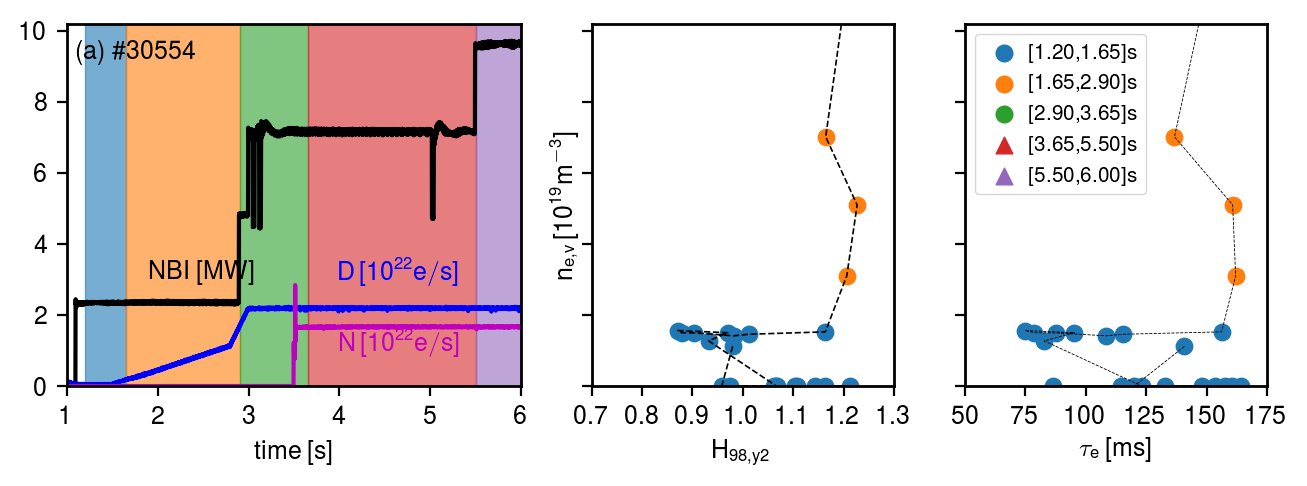

In [58]:
fig, axarr = plt.subplots(
            nrows=1, ncols=3, sharey=True, sharex=False, 
            gridspec_kw={'width_ratios':[1.5,1,1]},
            figsize=(6, 2.5), dpi=200)

ax0 = axarr[0]
ax1 = axarr[1]
ax2 = axarr[2]

ax0.text(0.02,0.9,'(a) \#30554',transform=ax0.transAxes)

#Discharge evolution
ax0.plot(snbi.time, snbi.data*1e-6,color='k')
ax0.plot(sdtot.time, sdtot.data*1e-22,color='b')
ax0.plot(sntot.time, sntot.data*1e-22,color='m')
alp=0.6
ax0.axvspan(1.2,timesint[0],color='C0',alpha=alp)
ax0.axvspan(timesint[0],timesint[1],color='C1',alpha=alp)
ax0.axvspan(timesint[1],timesint[2],color='C2',alpha=alp)
ax0.axvspan(timesint[2],timesint[3],color='C3',alpha=alp)
ax0.axvspan(timesint[3],6.0,color='C4',alpha=alp)
ax0.text(1.9,3.0,'NBI [MW]')
ax0.text(4.0,3.0,r'$\mathrm{D\,[10^{22}e/s]}$', color='b')
ax0.text(4.0,1.0,r'$\mathrm{N\,[10^{22}e/s]}$', color='m')
ax0.set_xlim(1,6)
ax0.set_ylim(bottom=0)
ax0.set_xlabel('time [s]')

###Scatters
for i in range(len(h98i)):
    mrk = 'o'
    if t[i]<timesint[0]:
        clr=clr2[0]
    elif (t[i]>=timesint[0]) & (t[i]<=timesint[1]):
        clr = clr2[1]
    elif (t[i]>=timesint[1]) & (t[i]<=timesint[2]):
        clr = clr2[2]
    elif (t[i]>=timesint[2]) & (t[i]<=timesint[3]):
        clr = clr2[3]
        mrk = '^'
    else:
        clr = clr2[4]
        mrk = '^'
    ax1.scatter(h98i[i], rx6i[i]*1e-19, s=35, marker=mrk, c=clr)
    ax2.scatter(itau[i]*1e3, rx6i[i]*1e-19, s=35, marker=mrk, c=clr)

    
    
#Force labels
ax1.scatter([0,0],[0,0],c='C0',label='[1.20,%0.2f]s'%(timesint[0]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
ax1.scatter([0,0],[0,0],c='C1',label='[%0.2f,%0.2f]s'%(timesint[0],timesint[1]))#,label=r'$\mathrm{Fuel\,\,ramp}$')
ax1.scatter([0,0],[0,0],c='C2',label='[%0.2f,%0.2f]s'%(timesint[1],timesint[2]))#label=r'$\mathrm{Power\,\,step}$')
ax1.scatter([0,0],[0,0],c='C3',label='[%0.2f,%0.2f]s'%(timesint[2],timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax1.scatter([0,0],[0,0],c='C4',label='[%0.2f,6.00]s'%(timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax1.plot(h98i, rx6i*1e-19, c='k', lw=0.6, ls='--')

ax1.set_xticks([0.7,0.8,0.9,1.0,1.1,1.2,1.3])

plt.legend(handletextpad=0.2, fontsize='small', frameon=False)
ax1.set_xlim(0.7,1.3)
ax1.set_xlabel(r'$\mathrm{H_{98,y2}}$')
ax1.set_ylabel(r'$\mathrm{n_{e,v}\,[10^{19}m^{-3}]}$')

#Force labels
ax2.scatter([0,0],[0,0],c='C0',label='[1.20,%0.2f]s'%(timesint[0]))#r'$\mathrm{Low\,\,P_{heat}/fuel}$')
ax2.scatter([0,0],[0,0],c='C1',label='[%0.2f,%0.2f]s'%(timesint[0],timesint[1]))#,label=r'$\mathrm{Fuel\,\,ramp}$')
ax2.scatter([0,0],[0,0],c='C2',label='[%0.2f,%0.2f]s'%(timesint[1],timesint[2]))#label=r'$\mathrm{Power\,\,step}$')
ax2.scatter([0,0],[0,0],c='C3',label='[%0.2f,%0.2f]s'%(timesint[2],timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax2.scatter([0,0],[0,0],c='C4',label='[%0.2f,6.00]s'%(timesint[3]),marker='^')#label=r'$\mathrm{N\,\,seeding}$', marker='^')
ax2.plot(itau*1e3,rx6i*1e-19, c='k', lw=0.3, ls='--')

#plt.text(0.72, 0, '\#30554')
ax2.set_xlim(50,175)
ax2.set_xticks([50,75,100,125,150,175])

ax2.legend(handletextpad=0.2, fontsize='small')

ax2.set_xlabel(r'$\mathrm{\tau_e\,[ms]}$')

plt.tight_layout()
plt.subplots_adjust(left=0.02,right=1.02,wspace=0.2)
#plt.savefig('Revised/Discharge_evolution.png',dpi=300)
plt.show()